## Importing the python libraries

In [106]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt,os,sys,seaborn as sns

## Uploading the customer churn data set

In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/churndata_processed.csv")

In [3]:
df.head(3)

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
0,0.00,0,0.094118,0,0,1,0,0,0.0,1,...,0,0,1,0,0,0,0,0,0,0
1,0.00,1,0.200000,0,1,0,0,1,0.0,1,...,1,0,0,1,0,0,0,0,0,1
2,0.25,1,0.611765,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,0,1,0


## Descriptive statistic of the data

In [4]:
round(df.describe(),4)

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
count,7043.0000,7043.0000,7043.0000,7043.0000,7043.0000,7043.0000,7043.0000,7043.0000,7043.0000,7043.0000,...,7043.0000,7043.0000,7043.0000,7043.0000,7043.0000,7043.0000,7043.0000,7043.0000,7043.0000,7043.0000
mean,0.4336,0.4218,0.2414,0.2867,0.3449,0.3439,0.2902,0.6737,0.3774,0.5922,...,0.3903,0.0547,0.2346,0.4309,0.2167,0.0738,0.1170,0.0589,0.0855,0.1143
std,0.3982,0.4939,0.2402,0.4522,0.4754,0.4750,0.4539,0.4689,0.4242,0.4915,...,0.4879,0.2273,0.4238,0.4952,0.4120,0.2615,0.3214,0.2355,0.2796,0.3182
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,0.0353,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,0.2500,0.0000,0.2000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,0.7500,1.0000,0.3176,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


## Data types

In [5]:
df.dtypes

months                       float64
multiple                       int64
gb_mon                       float64
security                       int64
backup                         int64
protection                     int64
support                        int64
unlimited                      int64
contract                     float64
paperless                      int64
monthly                      float64
satisfaction                 float64
churn_value                    int64
payment_Credit Card            int64
payment_Mailed Check           int64
internet_type_DSL              int64
internet_type_Fiber Optic      int64
internet_type_None             int64
offer_Offer A                  int64
offer_Offer B                  int64
offer_Offer C                  int64
offer_Offer D                  int64
offer_Offer E                  int64
dtype: object

### Identify the binary variables, ordinal variables
### Find the uniques values for each variables

In [6]:
df_uniques=pd.DataFrame([[name,len(df[name].unique())] for name in df.columns],columns=['Variable','Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
months,5
multiple,2
gb_mon,50
security,2
backup,2
protection,2
support,2
unlimited,2
contract,3


### Find the binary variables
### if the unique values corresponding to variable is 2 then the variable is binary

In [36]:
binary_variables=list(df_uniques[df_uniques['Unique Values']==2].index)
binary_variables

['multiple',
 'security',
 'backup',
 'protection',
 'support',
 'unlimited',
 'paperless',
 'churn_value',
 'payment_Credit Card',
 'payment_Mailed Check',
 'internet_type_DSL',
 'internet_type_Fiber Optic',
 'internet_type_None',
 'offer_Offer A',
 'offer_Offer B',
 'offer_Offer C',
 'offer_Offer D',
 'offer_Offer E']

### Find the categorical variables
### if the unique values corresponding to variable is greater than 2 and less than 6 then the variable is categorical variables

In [37]:
categorical_variables=list(df_uniques[(df_uniques['Unique Values']<=5) & (df_uniques['Unique Values']>2)].index)
categorical_variables

['months', 'contract', 'satisfaction']

### Now we look at the values of the categorical variables to see whether they are ordinal variables

In [38]:
[[name,list(df[name].unique())] for name in categorical_variables]

[['months', [1, 0]], ['contract', [1, 0]], ['satisfaction', [0, 1]]]

In [39]:
ordinal_variables=['months','contract','satisfaction']

In [40]:
set(categorical_variables)
set(ordinal_variables)

{'contract', 'months', 'satisfaction'}

### Rest of the varaibles in the data set are numerical variables.

In [41]:
numeric_variables=list(set(df.columns)-set(binary_variables)-set(categorical_variables))
numeric_variables

['gb_mon', 'monthly']

### Graphical representation of the numeric variables
### Histogram

array([[<AxesSubplot:title={'center':'gb_mon'}>,
        <AxesSubplot:title={'center':'monthly'}>]], dtype=object)

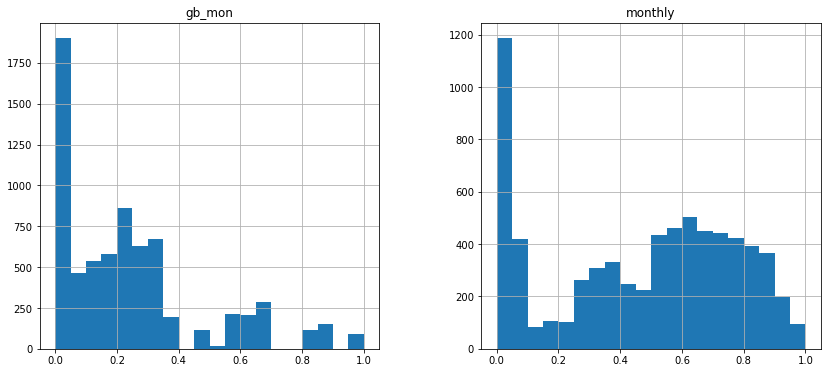

In [42]:
df[numeric_variables].hist(figsize=(14,6),bins=20)

### Data Preprocessing
### K-nearest neighbors requires scaling of the data as it uses distance
### save the scaled data in a csv file

In [43]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder,OrdinalEncoder

In [44]:
lb,le,oe=LabelBinarizer(),LabelEncoder(),OrdinalEncoder()

In [45]:
for column in ordinal_variables:
    df[column]=le.fit_transform(df[column])

In [46]:
for column in binary_variables:
    df[column]=lb.fit_transform(df[column])

### Define the categorical variables

In [47]:
categorical_variables=list(set(categorical_variables)-set(binary_variables)-set(ordinal_variables))

In [51]:
df=pd.get_dummies(df,columns=categorical_variables,drop_first=True)

### Descriptive statisctics of the data set after scaling

In [52]:
df.describe()

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.350703,0.421837,0.241358,0.286668,0.344881,0.343888,0.290217,0.673719,0.512566,0.592219,...,0.390317,0.054664,0.234559,0.430924,0.216669,0.073832,0.116996,0.058924,0.085475,0.114298
std,0.477224,0.493888,0.240223,0.452237,0.475363,0.475038,0.453895,0.468885,0.499878,0.491457,...,0.487856,0.227340,0.423753,0.495241,0.412004,0.261516,0.321438,0.235499,0.279607,0.318195
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.035294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.317647,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Scaling the numerical variables
### Importing the MinMAx scalar function from sklearn

In [63]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()

In [64]:
for column in [ordinal_variables+numeric_variables]:
    df[column]=mm.fit_transform(df[column])

### Descriptive statisctics of the data set after scaling all variables

In [65]:
round(df.describe(),4)

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
count,7043.0000,7043.0000,7043.0000,7043.0000,7043.0000,7043.0000,7043.0000,7043.0000,7043.0000,7043.0000,...,7043.0000,7043.0000,7043.0000,7043.0000,7043.0000,7043.0000,7043.0000,7043.0000,7043.0000,7043.0000
mean,0.3507,0.4218,0.2414,0.2867,0.3449,0.3439,0.2902,0.6737,0.5126,0.5922,...,0.3903,0.0547,0.2346,0.4309,0.2167,0.0738,0.1170,0.0589,0.0855,0.1143
std,0.4772,0.4939,0.2402,0.4522,0.4754,0.4750,0.4539,0.4689,0.4999,0.4915,...,0.4879,0.2273,0.4238,0.4952,0.4120,0.2615,0.3214,0.2355,0.2796,0.3182
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,0.0353,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,0.0000,0.0000,0.2000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,1.0000,1.0000,0.3176,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


### The preprocessing of the data has been done
### Now we should save the processed data for the later use

In [66]:
outputfile='churndata_processes.csv'
df.to_csv(outputfile,index=False)

### Divide the data into training and test set
### Fit the K nearest Neighborhood model
### Classification performance metrics

### Import the libraries

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,f1_score

### Setting up the covariates matrix X and the response vector y from the data set
### Then divide the dataset into train and test data sets

In [189]:
X,y=df.drop(columns='churn_value'),df['churn_value']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=1000)

### Fit the KNN model

In [190]:
knn=KNeighborsClassifier(n_neighbors=3)
knn_fit=knn.fit(X_train,y_train)
y_pred=knn_fit.predict(X_test) # Predict y for the test data set

### Print the classification report
### Print f1 score
### Print accuracy score

In [191]:
print(classification_report(y_test,y_pred))
print('Accuracy score',round(accuracy_score(y_test,y_pred),3))
print('F1 score',round(f1_score(y_test,y_pred),3))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      2063
           1       0.74      0.64      0.69       755

    accuracy                           0.84      2818
   macro avg       0.81      0.78      0.79      2818
weighted avg       0.84      0.84      0.84      2818

Accuracy score 0.844
F1 score 0.689


### Confusion matrix

In [192]:
confusion_matrix(y_test,y_pred)

array([[1893,  170],
       [ 269,  486]], dtype=int64)

Text(94.5, 0.5, 'Actual Response')

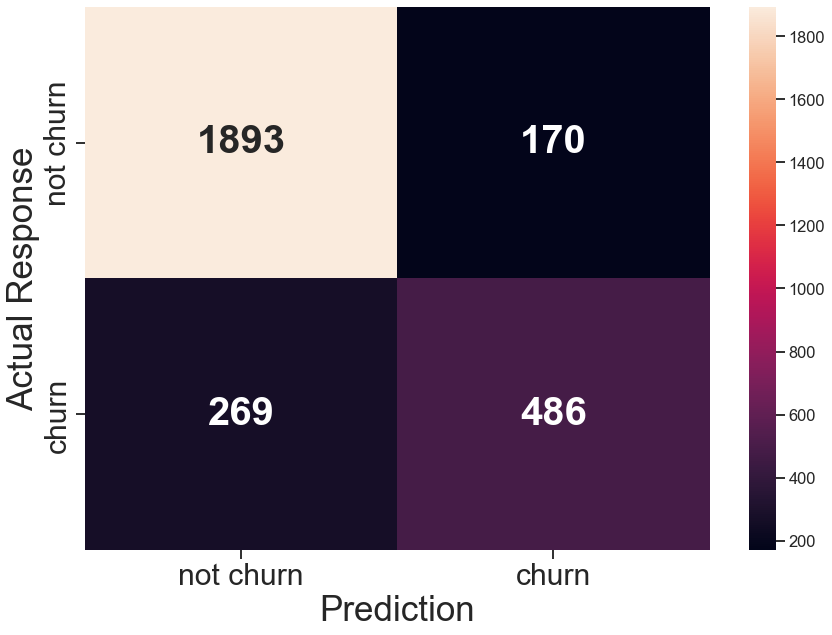

In [193]:
sns.color_palette()
_,ax=plt.subplots(figsize=(14,10))
ax=sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',annot_kws={'size':40,'weight':'bold'})
labels=['not churn','churn']
ax.set_xticklabels(labels,fontsize=30)
ax.set_yticklabels(labels,fontsize=30)
ax.set_xlabel('Prediction',fontsize=35)
ax.set_ylabel('Actual Response', fontsize=35)

### Now we need to determinr the optimal value of k


In [194]:
## fit the model for all k where the max_k=50
max_k=50
f1_scores=list() ## space for storing hte f1 scores for different k values
error_rates=list()  ## space for storing the error rates for all k values, error=1-accuracy
for k in range(1,max_k):
    knn=KNeighborsClassifier(n_neighbors=k,weights='distance')
    knn_fit=knn.fit(X_train,y_train)
    y_pred=knn_fit.predict(X_test)
    f1=f1_score(y_test,y_pred)
    f1_scores.append((k,round(f1,4)))
    error=1-round(accuracy_score(y_test,y_pred),4)
    error_rates.append((k,error))
f1_results=pd.DataFrame(f1_scores,columns=['K','F1 Score'])
error_results=pd.DataFrame(error_rates,columns=['K','Error Rate'])

### Now plot the F1 scores for found for all the values of k

<Figure size 1500x1000 with 0 Axes>

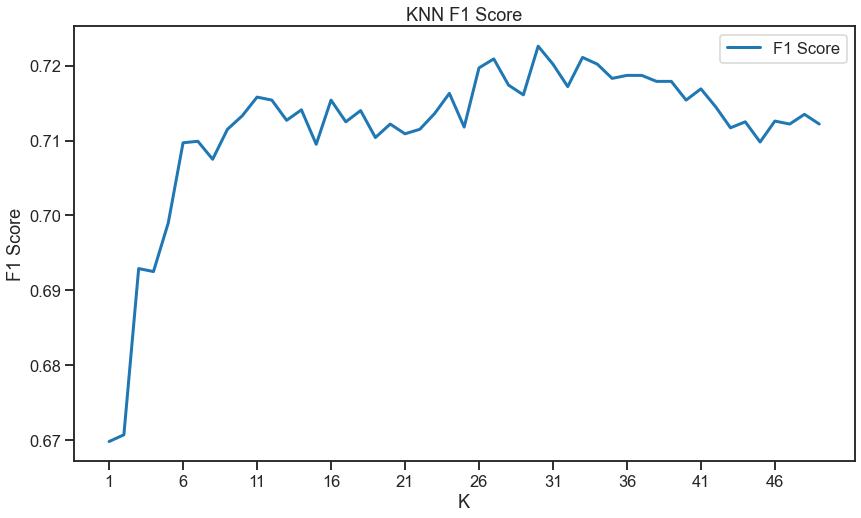

In [195]:
sns.set_context('talk')
sns.set_style('ticks')
plt.figure(dpi=250);
ax=f1_results.set_index('K').plot(figsize=(14,8),linewidth=3);
ax.set(xlabel='K',ylabel='F1 Score');
ax.set_xticks(range(1,max_k,5));
plt.title('KNN F1 Score');

<Figure size 1500x1000 with 0 Axes>

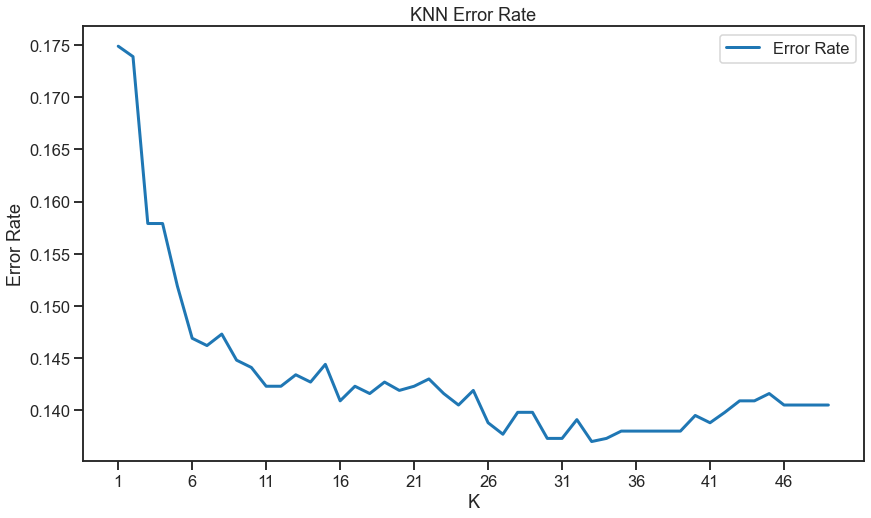

In [196]:

sns.set_context('talk')
sns.set_style('ticks')
plt.figure(dpi=250);
ax=error_results.set_index('K').plot(figsize=(14,8),linewidth=3);
ax.set(xlabel='K',ylabel='Error Rate');
ax.set_xticks(range(1,max_k,5));
plt.title('KNN Error Rate');

In [227]:
knn=KNeighborsClassifier(n_neighbors=33)
knn_fit=knn.fit(X_train,y_train)
y_pred=knn_fit.predict(X_test) # Predict y for the test data set

In [228]:
print(classification_report(y_test,y_pred))
print('Accuracy score',round(accuracy_score(y_test,y_pred),3))
print('F1 score',round(f1_score(y_test,y_pred),3))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2063
           1       0.80      0.64      0.72       755

    accuracy                           0.86      2818
   macro avg       0.84      0.79      0.81      2818
weighted avg       0.86      0.86      0.86      2818

Accuracy score 0.863
F1 score 0.715


Text(94.5, 0.5, 'Actual Response')

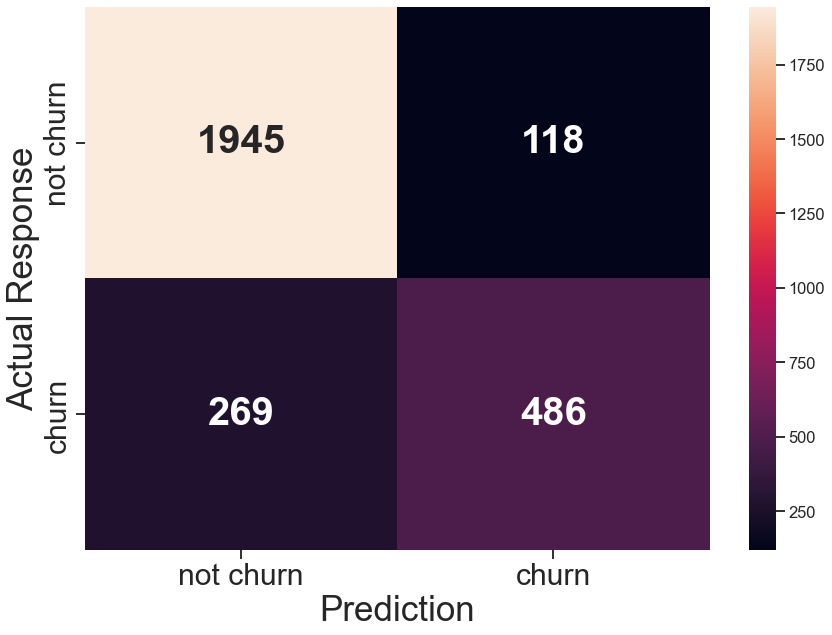

In [229]:
sns.color_palette()
_,ax=plt.subplots(figsize=(14,10))
ax=sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',annot_kws={'size':40,'weight':'bold'})
labels=['not churn','churn']
ax.set_xticklabels(labels,fontsize=30)
ax.set_yticklabels(labels,fontsize=30)
ax.set_xlabel('Prediction',fontsize=35)
ax.set_ylabel('Actual Response', fontsize=35)